In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from google.colab import drive

In [137]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
df = pd.read_csv("/content/drive/MyDrive/PTDLKD/Data/BTC-USD.csv")
df = df.sort_values("Date")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3143,2023-04-26,28300.058594,29995.837891,27324.548828,28422.701172,28422.701172,31854242019
3144,2023-04-27,28428.464844,29871.546875,28402.886719,29473.787109,29473.787109,27153445027
3145,2023-04-28,29481.013672,29572.791016,28929.609375,29340.261719,29340.261719,17544464887
3146,2023-04-29,29336.566406,29452.455078,29088.042969,29248.488281,29248.488281,10662634333


In [418]:
state = 100
test_size = 0.30
train_data_len = int(len(df) * (1 - test_size))

# y_train = pd.Series((df.High + df.Low) / 2)
y = df.Close 
X = pd.Series((df.High + df.Low) / 2)

X_train, X_test, y_train, y_test = train_test_split(X, y,  
    test_size=test_size, random_state=state)

In [419]:
gbr_params = {'n_estimators': 500,
          'max_depth': 10,
          'min_samples_split': 100,
          'learning_rate': 0.01,
          'loss': 'squared_error'}

gbr = GradientBoostingRegressor(**gbr_params)

In [420]:
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values
X_test = X_test.values.reshape(-1,1) 
y_test = y_test.values

In [421]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=10,
                          min_samples_split=100, n_estimators=500)

In [422]:
print("Model Accuracy: %.3f" % gbr.score(X_test, y_test))

Model Accuracy: 0.999


In [423]:
mse = mean_squared_error(y_test, gbr.predict(X_test), squared=False)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 493.0516


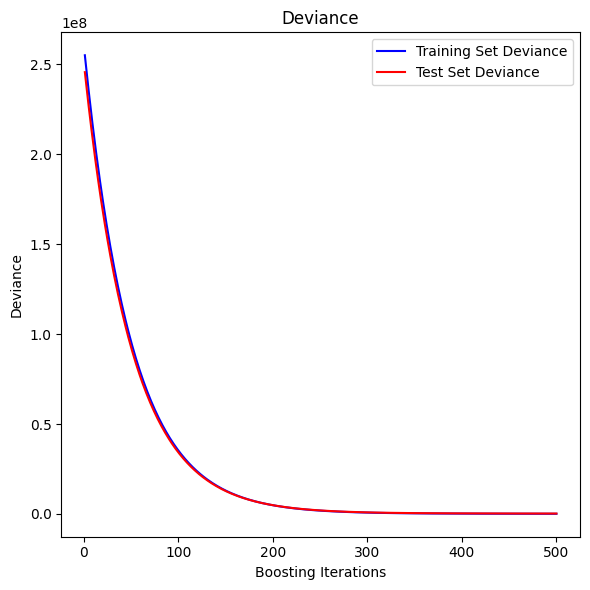

In [424]:
test_score = np.zeros((gbr_params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(gbr.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(gbr_params["n_estimators"]) + 1,
    gbr.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(gbr_params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

Test

In [425]:
# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#         Maria Telenczuk <https://github.com/maikia>
#         Katrina Ni <https://github.com/nilichen>
#
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [426]:
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

In [427]:
print(len(diabetes.data))

442


In [428]:
X, y 

(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
   

In [429]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [430]:
X_train, y_train

(array([[ 0.06713621,  0.05068012, -0.03099563, ...,  0.03430886,
          0.02337142,  0.08176444],
        [ 0.0562386 ,  0.05068012, -0.03099563, ..., -0.03949338,
         -0.02952643, -0.05906719],
        [-0.05637009, -0.04464164, -0.07410811, ..., -0.0763945 ,
         -0.0611758 , -0.04664087],
        ...,
        [ 0.01264814,  0.05068012,  0.00241654, ..., -0.03949338,
          0.00370906,  0.07348023],
        [ 0.04534098,  0.05068012,  0.01966154, ..., -0.00259226,
         -0.00330084,  0.01963284],
        [-0.06363517, -0.04464164, -0.03315126, ..., -0.00259226,
         -0.02251653, -0.05906719]]),
 array([172.,  91.,  48., 116., 185., 170., 129., 104.,  85.,  97.,  84.,
        170.,  87., 186., 273., 230., 141., 134.,  96.,  94.,  71., 214.,
        235., 252.,  72., 276., 197.,  91., 277., 145.,  52., 131.,  91.,
         65., 102.,  93., 191.,  83., 201.,  96., 118., 168.,  71., 258.,
         84., 108., 185., 198., 262.,  78., 172.,  72.,  40., 243.,  93.,
   

In [431]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test), squared=False)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 55.2123


In [432]:
print("Model Accuracy: %.3f" % reg.score(X_test, y_test))

Model Accuracy: 0.415


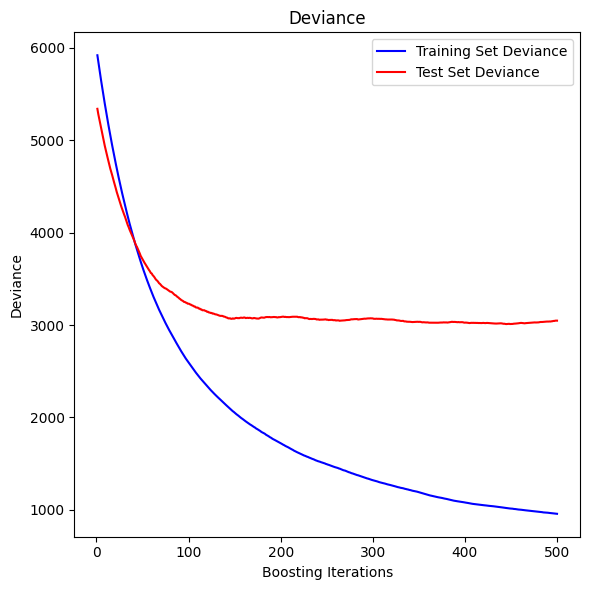

In [433]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()